In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Зареждане на данни
data = pd.read_csv('spaceship_titanic.csv')


In [2]:
# Проверка на типовете атрибути
print(data.info())

# Преглед на първите редове на данните
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None
  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  Fals

In [3]:
# Статистическо описание на числовите атрибути
print(data.describe())

# Статистическо описание на категорийни атрибути
print(data.describe(include=['object']))


               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000  
       PassengerId HomePlanet CryoSleep    Cabin  Destination    VIP  \
count         8693       84

In [4]:
# Проверка за липсващи стойности
print(data.isnull().sum())

# Попълване на липсващи стойности
data['CryoSleep'].fillna(data['CryoSleep'].mode()[0], inplace=True)
data['HomePlanet'].fillna(data['HomePlanet'].mode()[0], inplace=True)
data['Destination'].fillna(data['Destination'].mode()[0], inplace=True)
data['Age'].fillna(data['Age'].median(), inplace=True)
data['VIP'].fillna(False, inplace=True)

# Попълване на липсващи стойности в останалите колони с 0
for col in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    data[col].fillna(0, inplace=True)


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


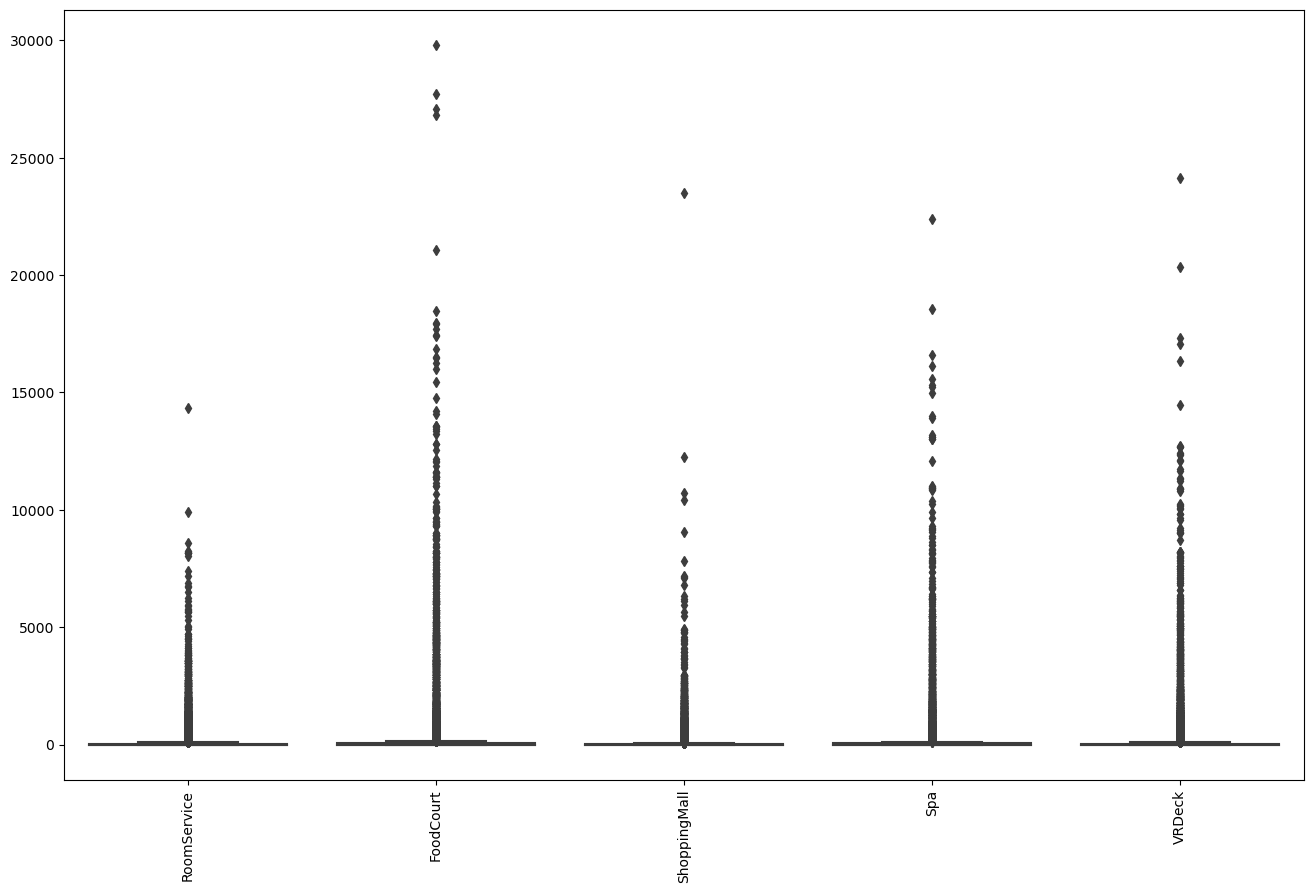

In [5]:
# Изследване на крайни стойности чрез диаграми на разпръскване (box plots)
plt.figure(figsize=(16, 10))
sns.boxplot(data=data[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])
plt.xticks(rotation=90)
plt.show()

# Отстраняване на крайни стойности
for col in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]


/tmp/ipykernel_39161/2595262698.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


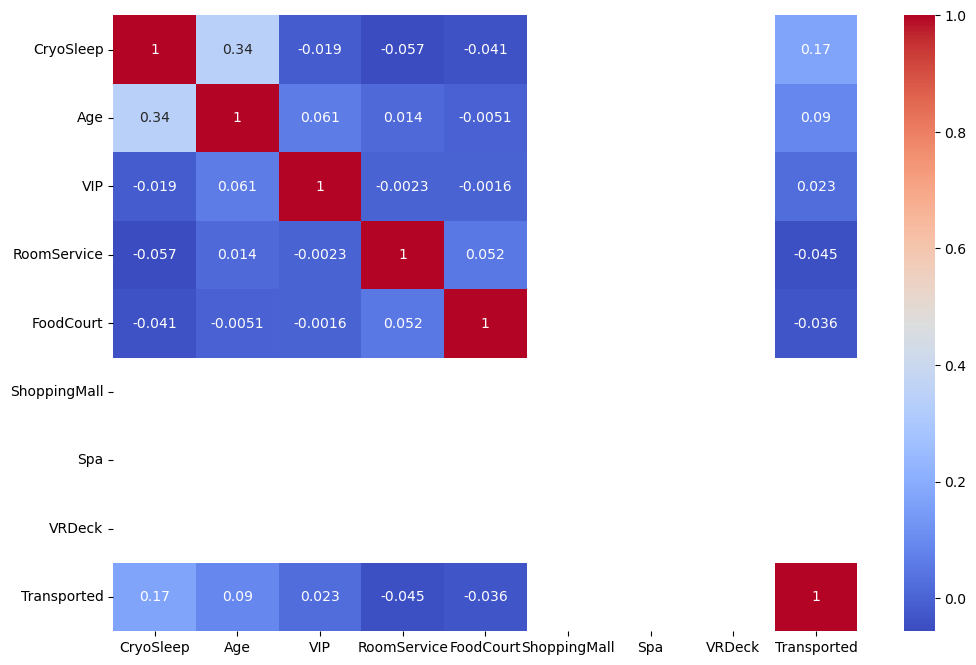

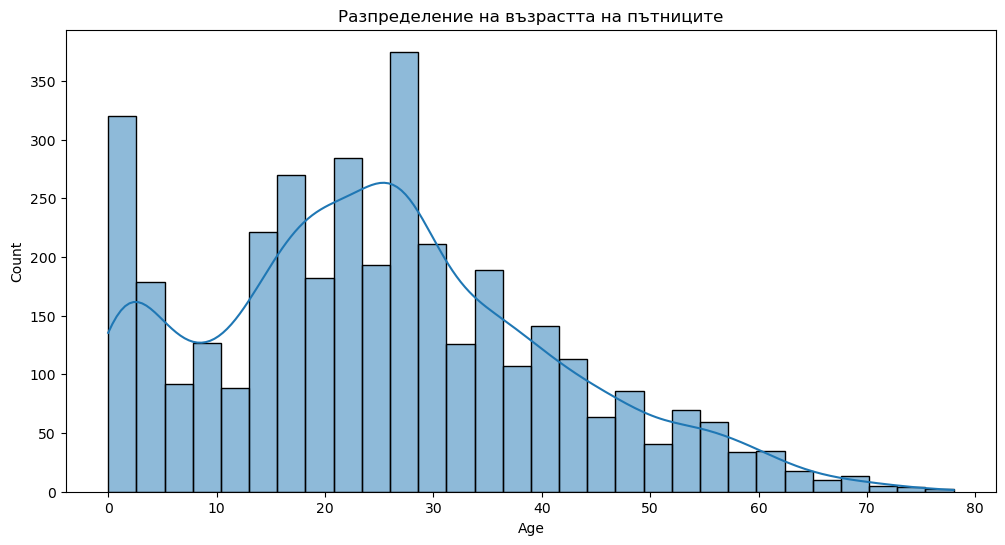

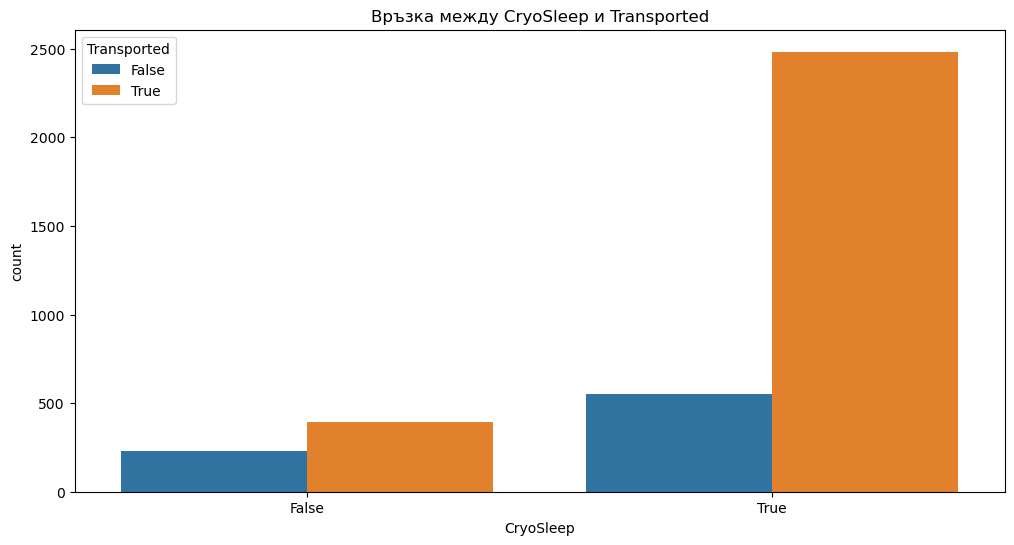

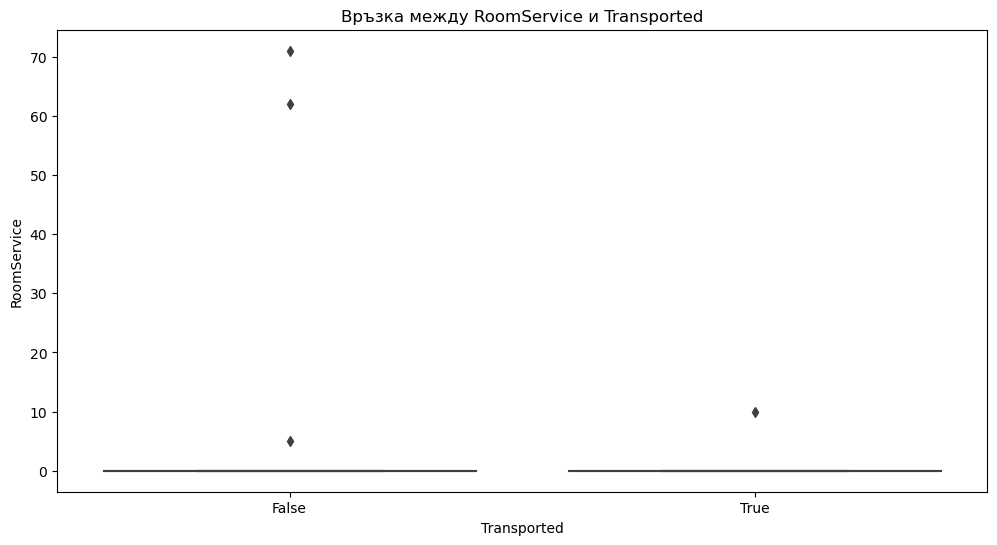

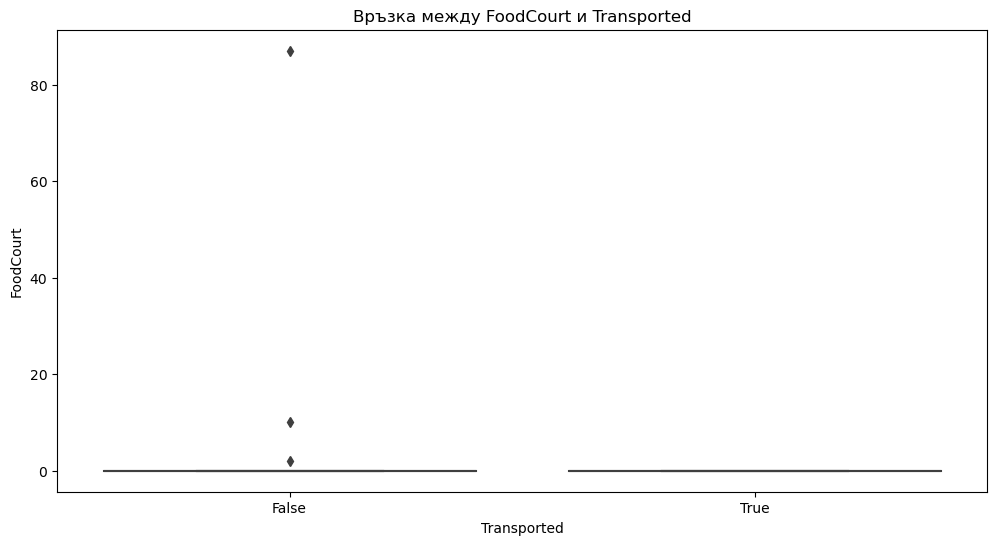

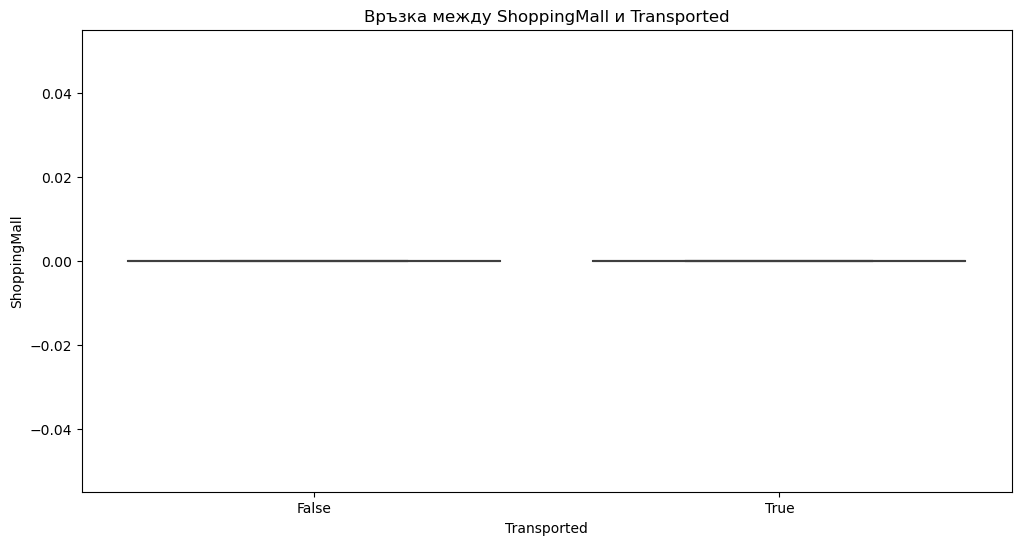

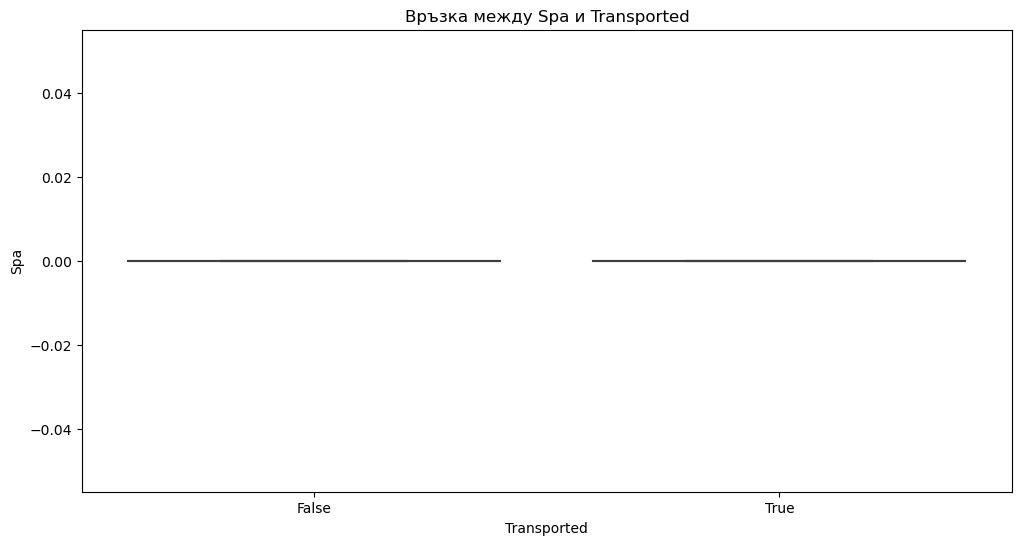

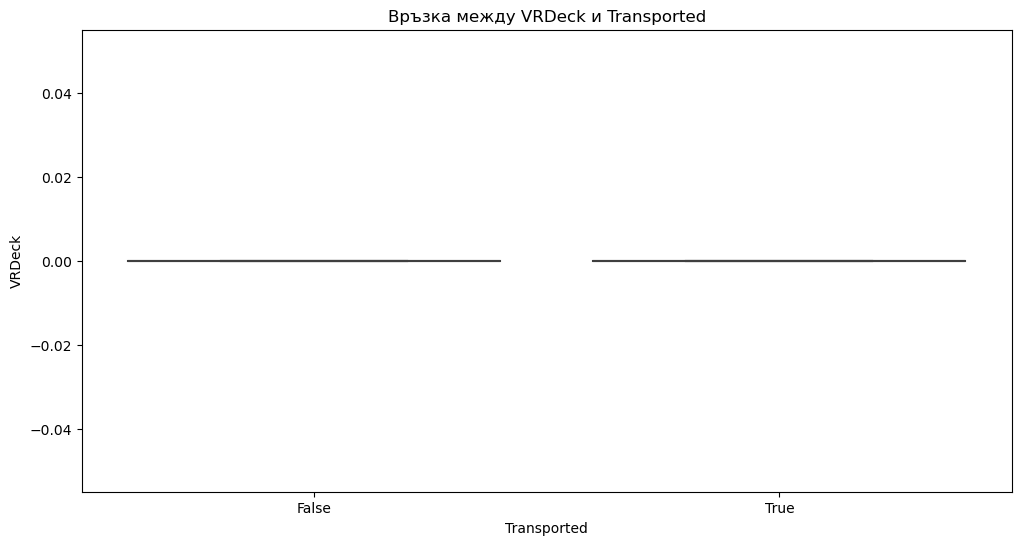

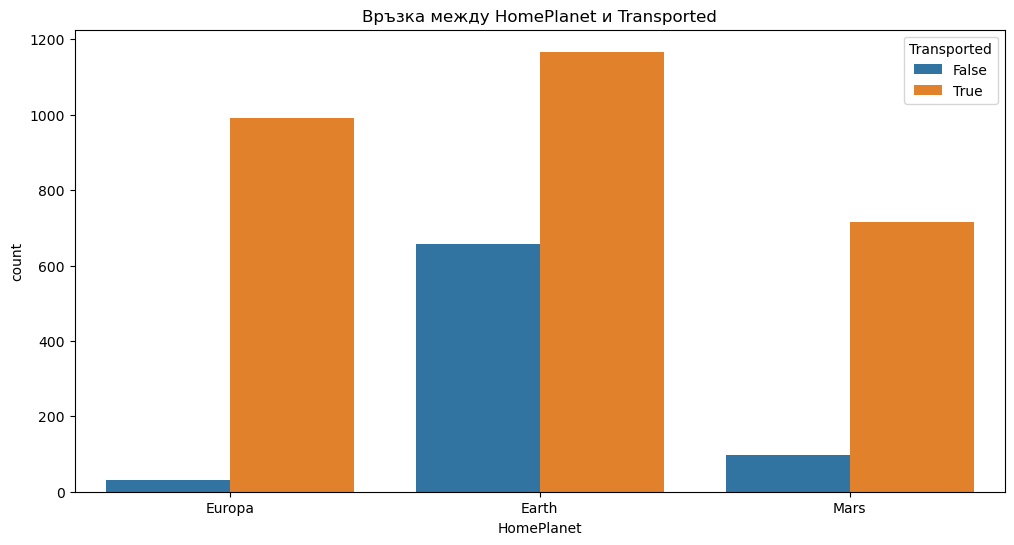

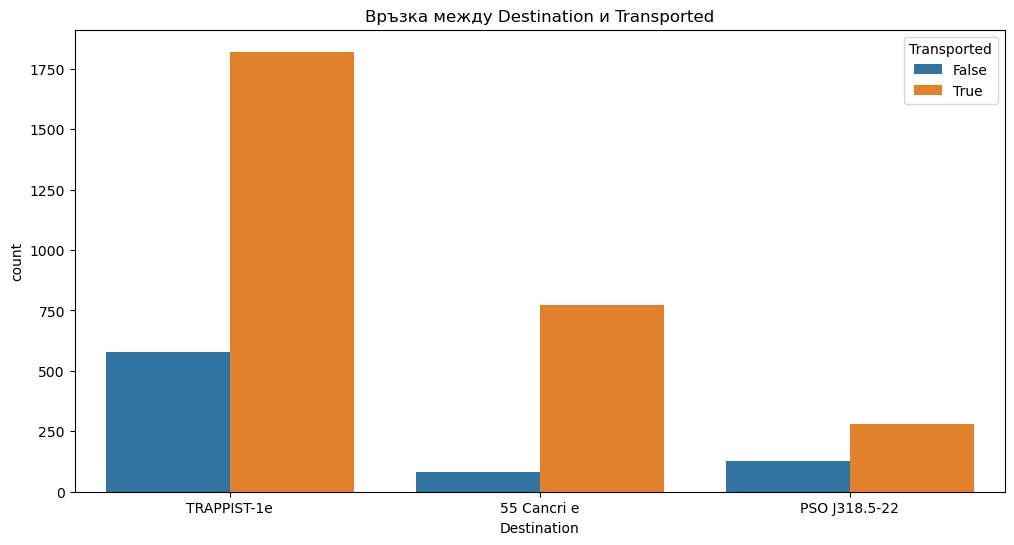

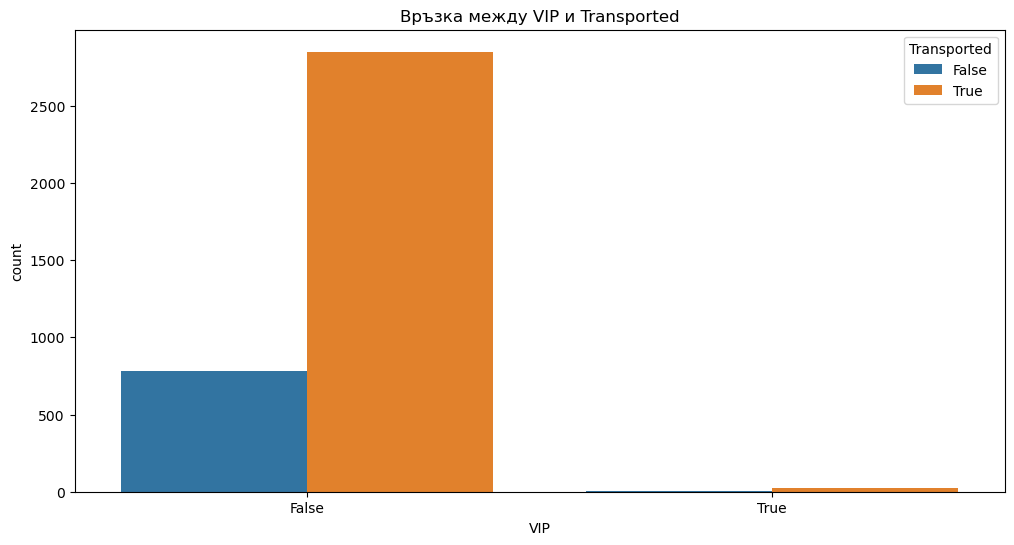

In [6]:
# Корелационна матрица
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Разпределение на възрастта
plt.figure(figsize=(12, 6))
sns.histplot(data['Age'], kde=True, bins=30)
plt.title('Разпределение на възрастта на пътниците')
plt.show()

# Връзка между CryoSleep и Transported
plt.figure(figsize=(12, 6))
sns.countplot(x='CryoSleep', hue='Transported', data=data)
plt.title('Връзка между CryoSleep и Transported')
plt.show()

# Разходи за услуги и транспортиране
plt.figure(figsize=(12, 6))
sns.boxplot(x='Transported', y='RoomService', data=data)
plt.title('Връзка между RoomService и Transported')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Transported', y='FoodCourt', data=data)
plt.title('Връзка между FoodCourt и Transported')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Transported', y='ShoppingMall', data=data)
plt.title('Връзка между ShoppingMall и Transported')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Transported', y='Spa', data=data)
plt.title('Връзка между Spa и Transported')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Transported', y='VRDeck', data=data)
plt.title('Връзка между VRDeck и Transported')
plt.show()

# Връзка между HomePlanet и Transported
plt.figure(figsize=(12, 6))
sns.countplot(x='HomePlanet', hue='Transported', data=data)
plt.title('Връзка между HomePlanet и Transported')
plt.show()

# Връзка между Destination и Transported
plt.figure(figsize=(12, 6))
sns.countplot(x='Destination', hue='Transported', data=data)
plt.title('Връзка между Destination и Transported')
plt.show()

# Връзка между VIP и Transported
plt.figure(figsize=(12, 6))
sns.countplot(x='VIP', hue='Transported', data=data)
plt.title('Връзка между VIP и Transported')
plt.show()


In [7]:
# Премахване на неинформативни атрибути
data.drop(['Name', 'Cabin', 'PassengerId'], axis=1, inplace=True)

# Превръщане на категорийни променливи в dummy променливи
data = pd.get_dummies(data, drop_first=True)


In [8]:
X = data.drop('Transported', axis=1)
y = data['Transported']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [9]:
# Логистична регресия
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Логистична регресия:")
print(classification_report(y_test, y_pred_lr))

# Дърво на решенията
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Дърво на решенията:")
print(classification_report(y_test, y_pred_dt))

# Поддръжка на векторни машини (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM:")
print(classification_report(y_test, y_pred_svm))

# k-близки съседи
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("k-близки съседи:")
print(classification_report(y_test, y_pred_knn))

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))


Логистична регресия:
              precision    recall  f1-score   support

       False       0.58      0.15      0.24       252
        True       0.79      0.97      0.87       846

    accuracy                           0.78      1098
   macro avg       0.68      0.56      0.56      1098
weighted avg       0.74      0.78      0.73      1098

Дърво на решенията:
              precision    recall  f1-score   support

       False       0.48      0.32      0.38       252
        True       0.82      0.90      0.85       846

    accuracy                           0.77      1098
   macro avg       0.65      0.61      0.62      1098
weighted avg       0.74      0.77      0.75      1098

SVM:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       252
        True       0.77      1.00      0.87       846

    accuracy                           0.77      1098
   macro avg       0.39      0.50      0.44      1098
weighted avg       0.59     

/home/galya777/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/galya777/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/galya777/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
